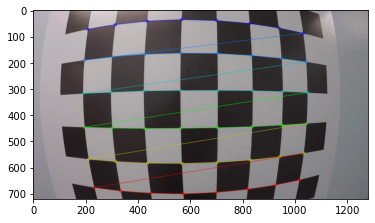

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# prepare object points
nx = 8 #TODO: enter the number of inside corners in x
ny = 6 #TODO: enter the number of inside corners in y

# Make a list of calibration images
fname = './calibration_test.png'
img = cv2.imread(fname)

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Find the chessboard corners
ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

# If found, draw corners
if ret == True:
    # Draw and display the corners
    cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
    plt.imshow(img)

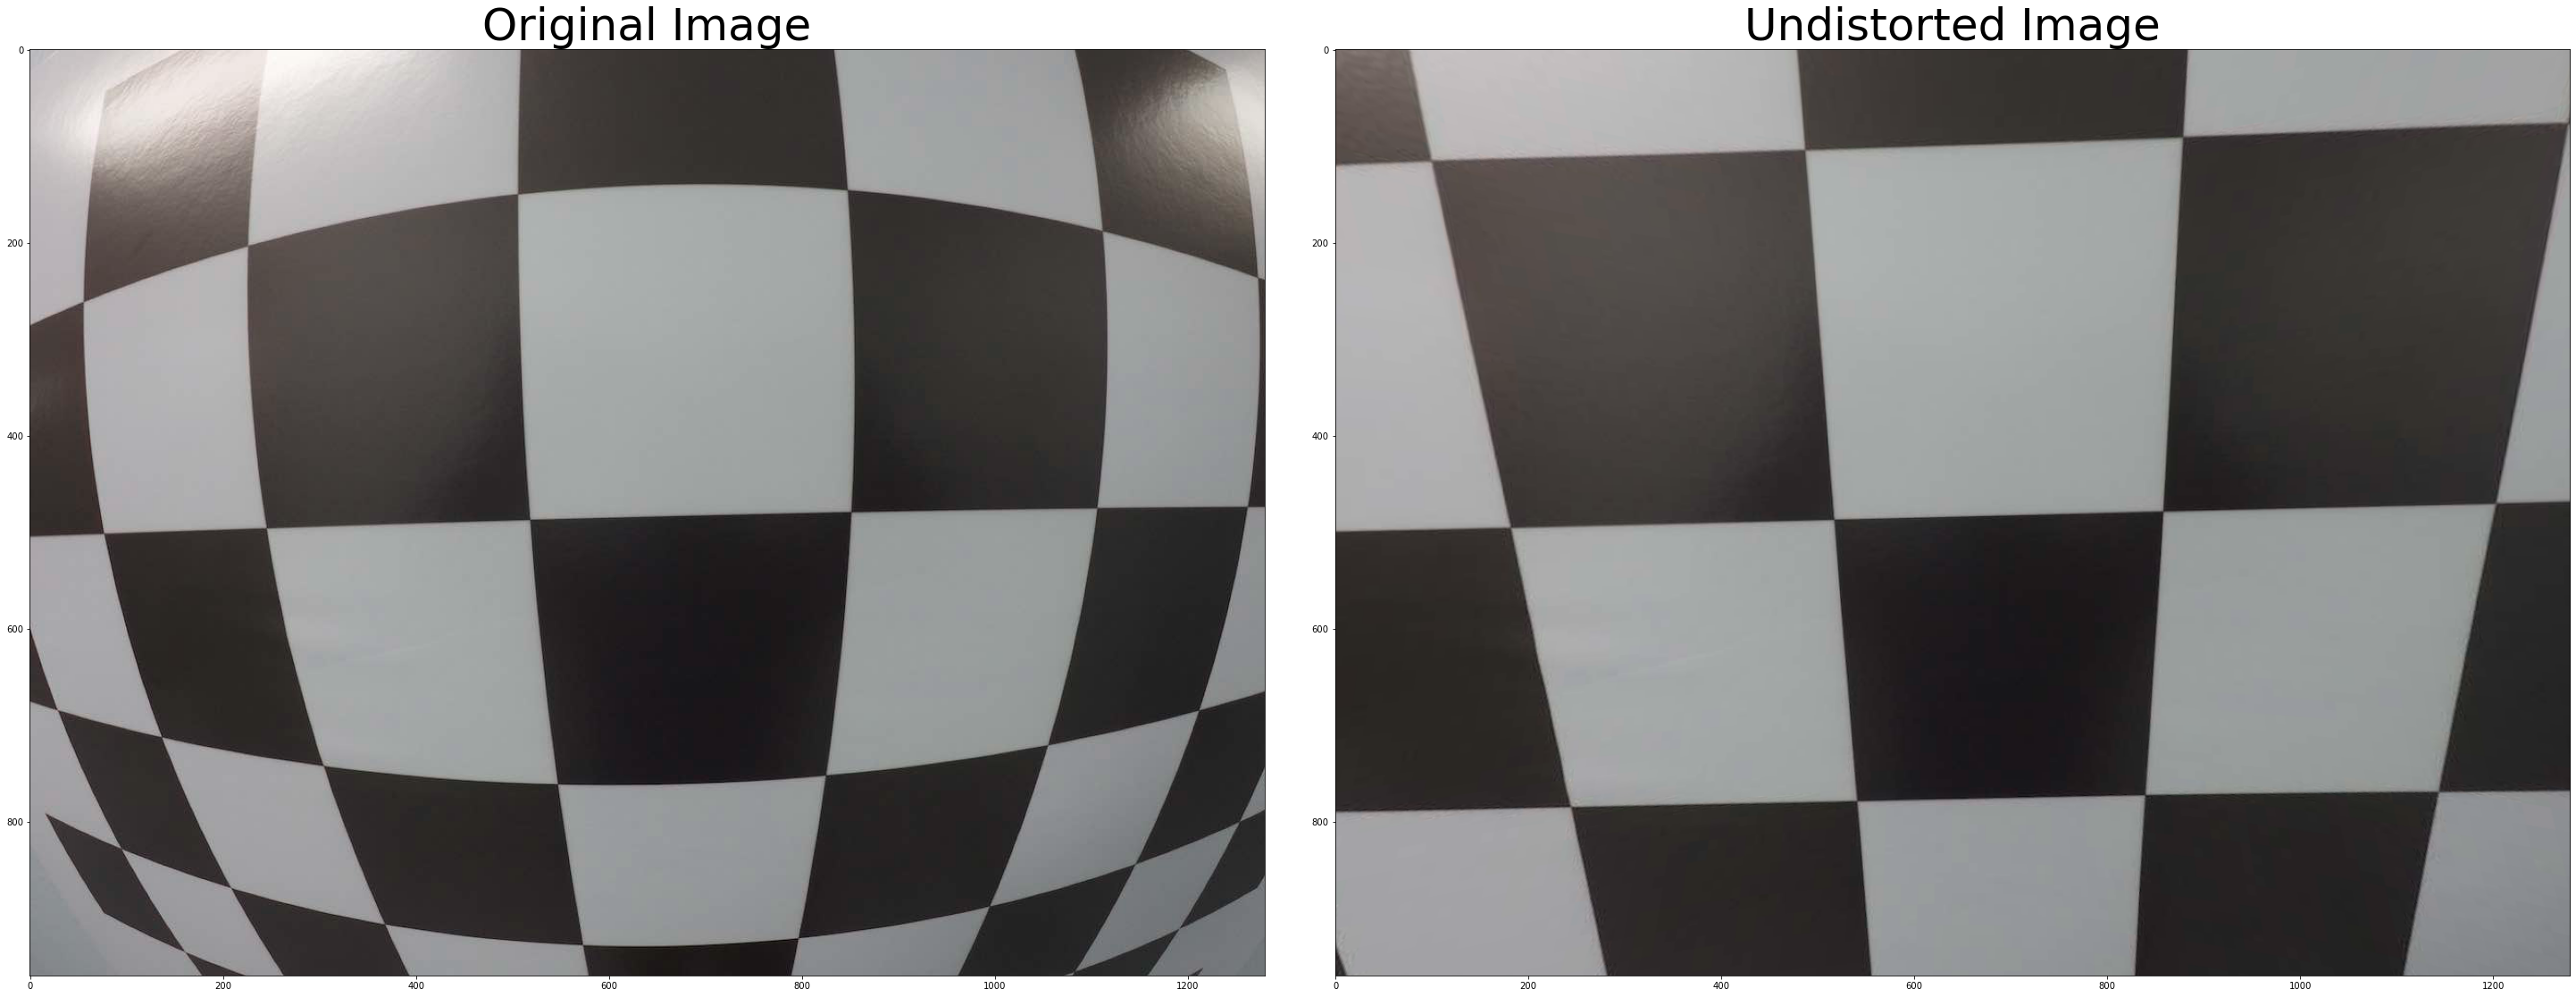

In [2]:
import pickle
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Read in the saved objpoints and imgpoints
dist_pickle = pickle.load( open( "./wide_dist_pickle.p", "rb" ) )
objpoints = dist_pickle["objpoints"]
imgpoints = dist_pickle["imgpoints"]

# Read in an image
img = cv2.imread('./test_image.png')

# TODO: Write a function that takes an image, object points, and image points
# performs the camera calibration, image distortion correction and 
# returns the undistorted image
def cal_undistort(img, objpoints, imgpoints):
    # Use cv2.calibrateCamera() and cv2.undistort()
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, (8,6), None)
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
    undist = cv2.undistort(img, mtx, dist, None, mtx)  # Delete this line
    return undist

undistorted = cal_undistort(img, objpoints, imgpoints)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(40, 16))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(undistorted)
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

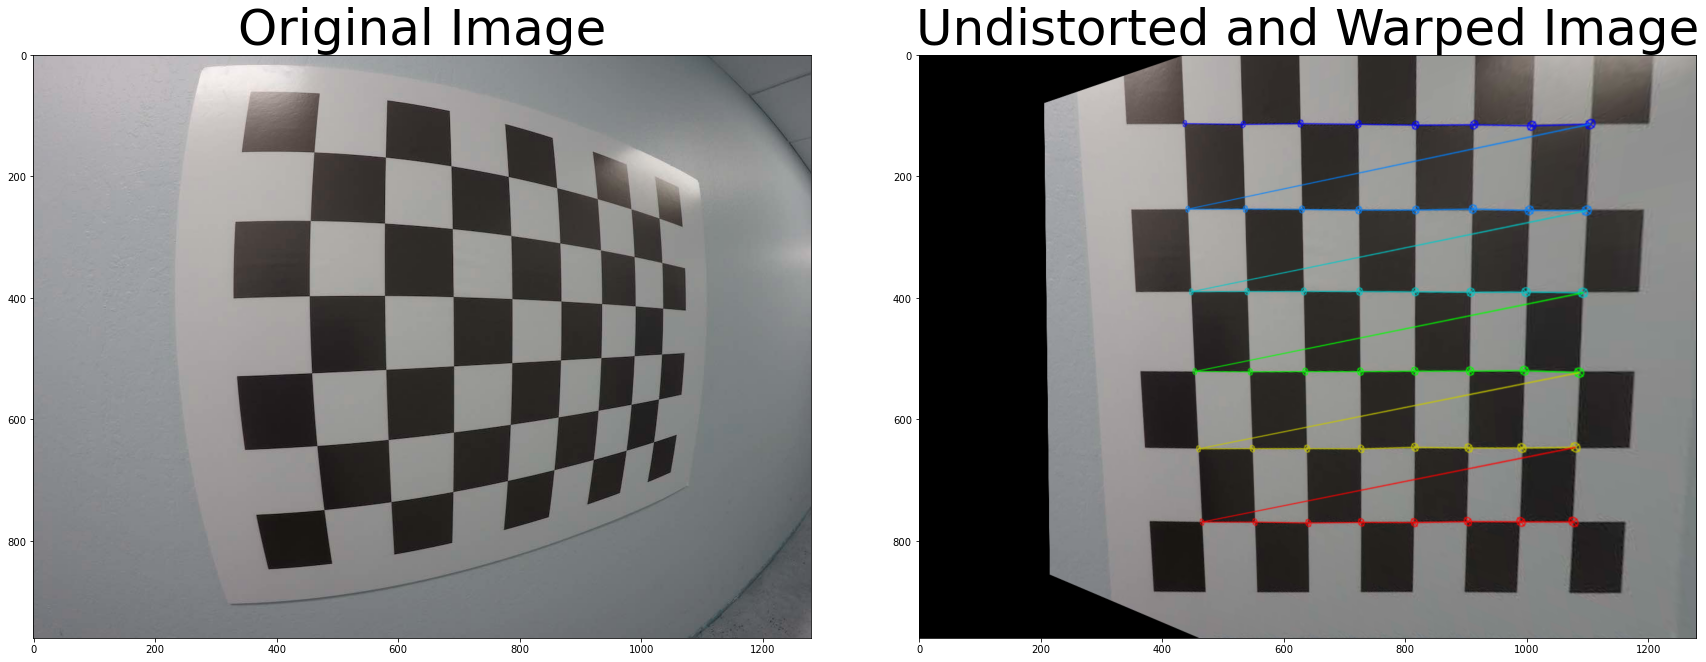

In [35]:
import pickle
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Read in the saved camera matrix and distortion coefficients
# These are the arrays you calculated using cv2.calibrateCamera()
dist_pickle = pickle.load( open( "./wide_dist_pickle.p", "rb" ) )
mtx = dist_pickle["mtx"]
dist = dist_pickle["dist"]

# Read in an image
img = cv2.imread('./test_image2.png')
nx = 8 # the number of inside corners in x
ny = 6 # the number of inside corners in y

# MODIFY THIS FUNCTION TO GENERATE OUTPUT 
# THAT LOOKS LIKE THE IMAGE ABOVE
def corners_unwarp(img, nx, ny, mtx, dist):
    # Pass in your image into this function
    # Write code to do the following steps
    # 1) Undistort using mtx and dist
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    # 2) Convert to grayscale
    gray = cv2.cvtColor(undist,cv2.COLOR_BGR2GRAY)
    # 3) Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (8,6), None)
    # 4) If corners found: 
        # a) draw corners
        # Draw and display the corners
    if ret == True:
            img_size = (gray.shape[1], gray.shape[0])
            cv2.drawChessboardCorners(undist, (nx, ny), corners, ret)
            # define 4 source points src = np.float32([[,],[,],[,],[,]])
            src= np.float32([corners[0],corners[nx-1],corners[-1],corners[-nx]])
            # define 4 destination points dest = np.float32([[,],[,],[,],[,]])
            dest=np.float32([corners[0],[[corners[nx-1][0][0],corners[0][0][1]]],[[corners[-1][0][0],corners[-nx][0][1]]],corners[-nx]])
            M = cv2.getPerspectiveTransform(src, dest)
            warped = cv2.warpPerspective(undist, M, img_size, flags=cv2.INTER_LINEAR)
    return dest,warped, M

#plt.imshow(undist)
#plt.plot(dest[0][0][0],dest[0][0][1],'x')
#plt.plot(dest[1][0][0],dest[1][0][1],'x')
#plt.plot(dest[2][0][0],dest[2][0][1],'x')
#plt.plot(dest[3][0][0],dest[3][0][1],'x')
#plt.imshow(warped)

dest, top_down, perspective_M = corners_unwarp(img, nx, ny, mtx, dist)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(top_down)
ax2.set_title('Undistorted and Warped Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)



In [30]:
#Reference for myself (to detect corners manually)
x_topleft=min([item[0][0] for item in corners])
x_bottomleft=x_topleft
y_topleft=min([item[0][1] for item in corners])
y_bottomleft=y_topleft
x_topright=max([item[0][0] for item in corners])
x_bottomright=x_topright
y_topright=max([item[0][1] for item in corners])
y_bottomright=y_topright
x_topleft, x_bottomleft, x_topright,x_bottomright, y_topleft,y_bottomleft,y_topright, y_bottomright


(436.50708,
 436.50708,
 1103.9984,
 1103.9984,
 114.335556,
 114.335556,
 768.5894,
 768.5894)